# US Biodiversity Project

The purpose of this project is to take some biodiversity data collected externally and explore it using summary statistics and visualisations.

The data will first need to be examined, cleaned, and potentially modified to be able to work with it.

Exploring the files provided, we have two files; observations and species info. 

The observations file contains information on the number of observations of a particular species in a US national park. It records the frequency and park where it was seen.

The species info contains information on the specific species, namely its catgeory, scientific and common name, as well as conservation status.

## Loading the data

First, the data will be loaded and examined to get an idea of what to expect from the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

obs = pd.read_csv("observations.csv") #load observation data 
spec = pd.read_csv("species_info.csv") #load observation data

print(obs.head())
print(spec.head()) 

#loading the first 5 rows of each data set.

print(obs.info())
print(spec.info())

#printing the info of each table to find out the datatypes and identify any missing data.

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

# Initial Impressions

Looking at the data above, the observations table does not seem to have missing data and the observations column in particular is in the correct format of an integer. 

The species info table has 5824 species on record, it is not known is any of these are repeats for the time being. Of note is the conservation status column, of which only 191 non null values exist. Meaning the majority of the species it is unknown what their conservation status is. Filling in the non null values will be one of the changes to the data I will do to make it more readable. Secondly, it appears the common names column contains more than one common name and may need to be considered during the analysis.

## Initial data exploration

Next, I will look at the initial statistics of the data such as the number of unique entries with the intention of using this to find duplicated columns. As well as look into the conservation status and how the null values could be filled in.

In [2]:
print(obs.park_name.nunique()) #counting the number of unique national parks

#There appears to only be 4 national parks recorded in the data 

print(spec.category.nunique()) #counting the number of unique categories of species

#There appears to be 7 unique categories of species

print(spec.scientific_name.nunique()) #counting the number of unique species by scientific name

#There are only 5541 unique species, meaning there are some duplicates that could be dropped.

print(spec.conservation_status.unique()) #looking at the different types of conservation status

#There appears to be 4 distinct categories; Species of concern, endangered, threatened and in recovery. 
#Those with null values may be species who are not of concern and could be indentified as such.

spec = spec.drop_duplicates(subset = ["scientific_name"]) #dropping the duplicate species 
print(spec.info()) #checking that the number of unique species aligns with the number of species recorded by scientific name.
print(spec.scientific_name.nunique())

spec = spec.fillna(value = {"conservation_status":"No Concern"}) #replacing null values with No Concern
print(spec.conservation_status.unique()) #Checking that all null values have been replaced with No Concern.



4
7
5541
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB
None
5541
['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Exploring the Species Table

Now that the data has been wrangled in a sense, I will now do some deeper exploration of the species table. I have the following questions.

- What is the distribution of the species categories, are more of certain types of species recorded than others?
- What is the distribution of conservation status markers?
- Are certain categories of animals more likely to be threatened than others?

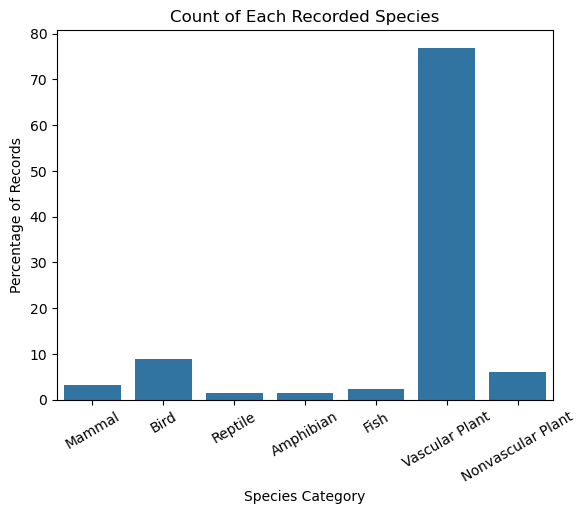

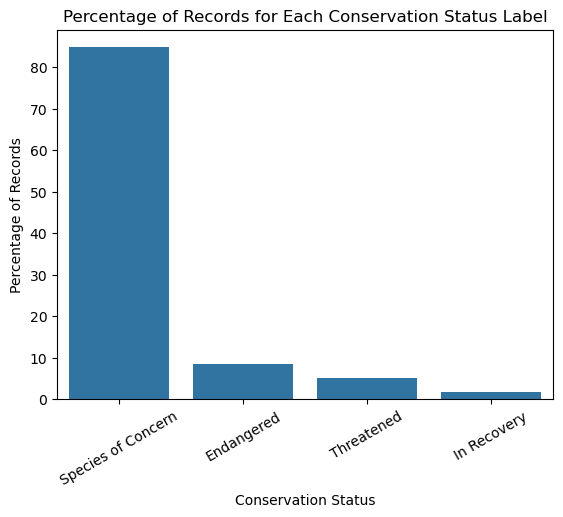

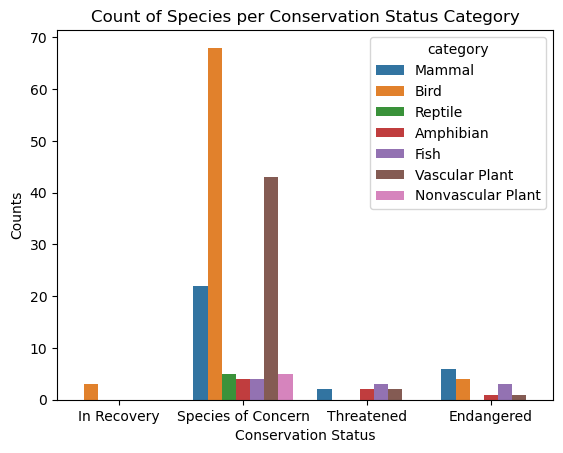

<Figure size 640x480 with 0 Axes>

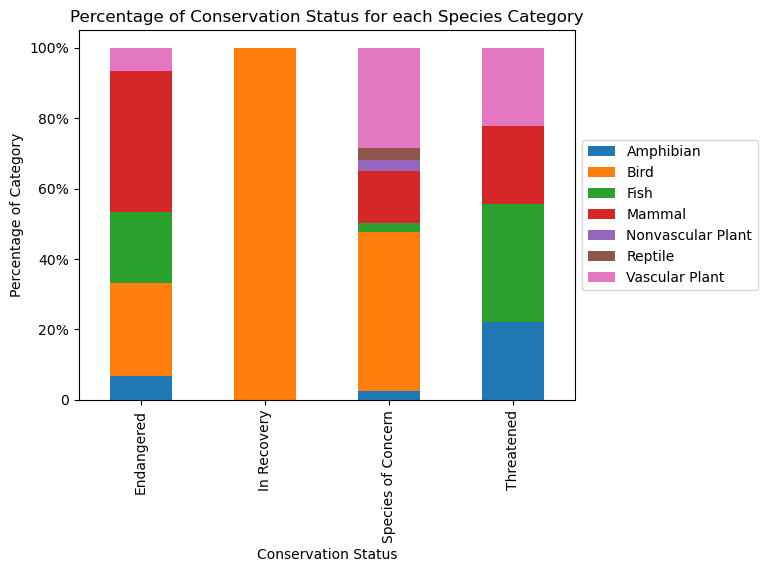

<Figure size 640x480 with 0 Axes>

In [5]:
sns.countplot(data = spec, x = "category", stat = "percent")
plt.xlabel("Species Category")
plt.ylabel("Percentage of Records")
plt.title("Count of Each Recorded Species")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

#Looking at the count plot, we can see thayt the majority of the data recorded is about vascular plants. This could be due to the shear number of
# plants that could be recorded across the national parks compared to other species. The bar plot has used a percentage modifier to better see the 
# proportions.

spec_concern = spec[spec.conservation_status != "No Concern"] #limiting to only species which are of at least some concern
# print(spec_concern.conservation_status.unique()) #checking 

spec_concern = spec_concern[["category", "conservation_status"]] #limiting the data to just the category and conservation status columns

sns.countplot(data = spec_concern, x = "conservation_status", stat = "percent")
plt.xlabel("Conservation Status")
plt.ylabel("Percentage of Records")
plt.title("Percentage of Records for Each Conservation Status Label")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

#creating a count plot of the conservation status category broken down by species category
sns.countplot(data = spec_concern, x = "conservation_status", hue = "category", order = ["In Recovery", "Species of Concern", "Threatened", "Endangered"])
plt.xlabel("Conservation Status")
plt.ylabel("Counts")
plt.title("Count of Species per Conservation Status Category")
plt.show()
plt.clf()

spec_concern_pivot = spec_concern.pivot_table(index = ["conservation_status"], columns = ["category"], aggfunc = lambda x : len(x), fill_value = 0, margins = True)
spec_concern_pivot = spec_concern_pivot.div(spec_concern_pivot.iloc[:,-1], axis = 0)
spec_concern_pivot = spec_concern_pivot.drop(labels = "All", axis = 0)
spec_concern_pivot = spec_concern_pivot.drop(labels = "All", axis = 1) #creating a pivot table of the data, setting values to percentages, then dropping the total columns.

# print(spec_concern_pivot) #checking the result

ax1 = spec_concern_pivot.plot.bar(stacked = True) #plotting the stacked bar chart.
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) #setting the legend outside the bar chart
ax1.set_xlabel("Conservation Status")
ax1.set_ylabel("Percentage of Category")
ax1.set_title("Percentage of Conservation Status for each Species Category") #setting labels and y ticks
ax1.set_yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ["0", "20%", "40%", "60%", "80%", "100%"])
plt.show()
plt.clf()


# Conservation Status Analysis

Considering the plots above, we can see that the majority of species that have a recorded conservation status are plant species, particularly vascular plants. These make up over 70% of the recorded species. Reptiles and Amphibians are both roughly 2% of recorded species, closely followed by fish. This could point to a wider variety of plant species and variations in the national parts in comparison to animal type species.

The second plot looks at the distributions of the species that have a recorded conservation status. Over 80% of species are recorded as "Of Concern", making up a significant majority. There are roughly 8% of species recorded as being endangered, followed by 6% as threatened, and ~2% as in recovery.

Looking at the third plot which breaks down each conservation status cetegory by species we can see that the majority of the species with a label are labeled as species of concern by a significant margin. This is closely followed by endangered, then threatened and finally in recovery. The fourth plot considers the percentage distribution of each species in each conservation category. This makes it easier to compare each species within each category and to see how they compare with the analysis below.

Something to note about this third plot is that despite birds only making up roughly 10% of recorded species, they are by far the most likely species to have any sort of conservation status label. There are almost 70 recorded bird species that are labeled as "of concern", followed by just over 40 vascular plant species, and around 22 mammal species. The other categories have less than 5 recorded as "of concern". Amphibians and fish are the least likely to be recorded as of concern, with reptiles and non-vascular plants closely following them.

Looking at the threatened column, only 4 species are labelled as threatened; mammal,amphibian, fish, and vasular plant, all with 3 of less recorded species. Similarly, the endangered column is only made up of 5 species, with Mammals and birds likely to be labelled as Endangered. 

Finally considered the in recovery column, only birds are labelled as in recovery, showing that there is still work to be done to reduce the number of species who are at risk.



# Exploring the Observations Table

The next table to be explored is the observation table. This table contains the number of observations for species across 4 national parks. Some questions I would like to consider.

- What is the most and least spotted species in each national park?
- Which national park has the most sightings?
- What is the distribution of species type across each national park?

To consider the last question it would be a good idea to add a category column to the observation table so that we are able to look at the distribution of species by category.

In [39]:
obs_joined = obs.merge(spec, on = "scientific_name") #merging data on scientific name to add conservation status and catgeory to data
print(obs_joined.info()) #checking data

obs_joined_ordered = obs_joined[["category", "conservation_status", "scientific_name", "park_name", "observations"]] #removing common name category and reordering
print(obs_joined_ordered.head()) #checking data.

#There are 5541 unique species by scientific name, there are 23296 observations, 4 * 5541 = 22164, could this mean there are duplicate observations?
#Or was there more than one observation recorded?

# grouping by scientific name and park names gives the exact 22164 results. However, including observations only drops to 22381. Meaning that there were
# roughly 15 duplicated observations, but where they independent? This shows that some species have duplicated rows but with different numbers
# of observations. Looking at the spreadsheet of data, the numbers are only slightly different when finding duplicated species. Does this mean
# that we should count these additional observations, or remove them entirely? For Analysis, I am going to remove duplicated rows to potentially remove
# overrepresentation of certain species.

obs_joined_ordered_clean = obs_joined_ordered.groupby(["scientific_name", "park_name", "observations"]).sample(n=1)

print(obs_joined_ordered_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23296 non-null  object
 1   park_name            23296 non-null  object
 2   observations         23296 non-null  int64 
 3   category             23296 non-null  object
 4   common_names         23296 non-null  object
 5   conservation_status  23296 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None
         category conservation_status           scientific_name  \
0  Vascular Plant          No Concern        Vicia benghalensis   
1          Mammal          No Concern            Neovison vison   
2  Vascular Plant          No Concern         Prunus subcordata   
3  Vascular Plant          No Concern      Abutilon theophrasti   
4  Vascular Plant          No Concern  Githopsis specularioides   

                             park_name  ob

park_name
Bryce National Park                     575901
Great Smoky Mountains National Park     431378
Yellowstone National Park              1442314
Yosemite National Park                  862836
Name: observations, dtype: int64


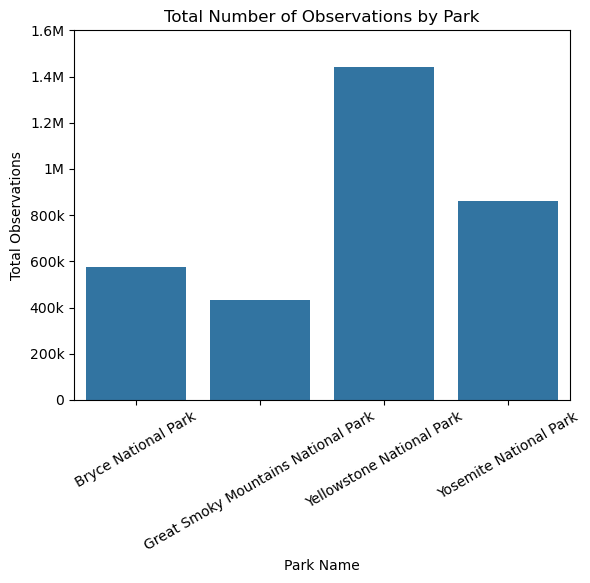

<Figure size 640x480 with 0 Axes>

In [54]:
# sns.countplot(data = obs_joined_ordered, x = "park_name", hue = "category")
# plt.xlabel("National Park")
# plt.ylabel("Count")
# plt.title("Number of Observation per Species in Each National Park")
# plt.xticks(rotation = 30)
# plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# plt.show()
# plt.clf()

#The plot shows that the same number of each species were looked at across all national parks in the table. Every species has an entry.

park_totals = obs_joined_ordered_clean.groupby("park_name").observations.sum()

print(park_totals)

sns.barplot(data = obs_joined_ordered_clean, x = "park_name", y = "observations", estimator = "sum", errorbar = None) #data of non-zero observations per park.
plt.xlabel("Park Name")
plt.xticks(rotation = 30)
plt.ylabel("Total Observations")
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000], ["0", "200k", "400k", "600k", "800k", "1M", "1.2M", "1.4M", "1.6M"])
plt.title("Total Number of Observations by Park")
plt.show()
plt.clf()


# Initial Thoughts

Looking at the chart above, we can see that Yelloewstone National Park had by far the largest total number of observations by far in comparison to the other parks. Great Smoky Mountains National Park had the least total observations. Considering land area, the details are below.

- Yellowstone National Park: 8991 square km
- Bryce National Park: 145 square km
- Great Smoky Mountain National Park: 2114 square km
- Yosemite National Park: 3074 square km.

 Yellowstone National Park covers the largest land area, which means it would make sense for it to have the largest number of total observations, however Bryce National park is incredibly small by comparison but still has close to 600k observations, making the density very high. What would be interesting to look at is the distribution of species in these national parks to see why the numbers are the way they are.

category                             Amphibian    Bird   Fish  Mammal  \
park_name                                                               
Bryce National Park                       7380   51647  12423   20550   
Great Smoky Mountains National Park       5707   37728   9206   15012   
Yellowstone National Park                19440  126996  30574   50539   
Yosemite National Park                   11444   76207  18615   30339   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                              32992     7950   
Great Smoky Mountains National Park              24857     5691   
Yellowstone National Park                        83021    19554   
Yosemite National Park                           49783    11483   

category                             Vascular Plant  
park_name                                            
Bryce National Park                          44295

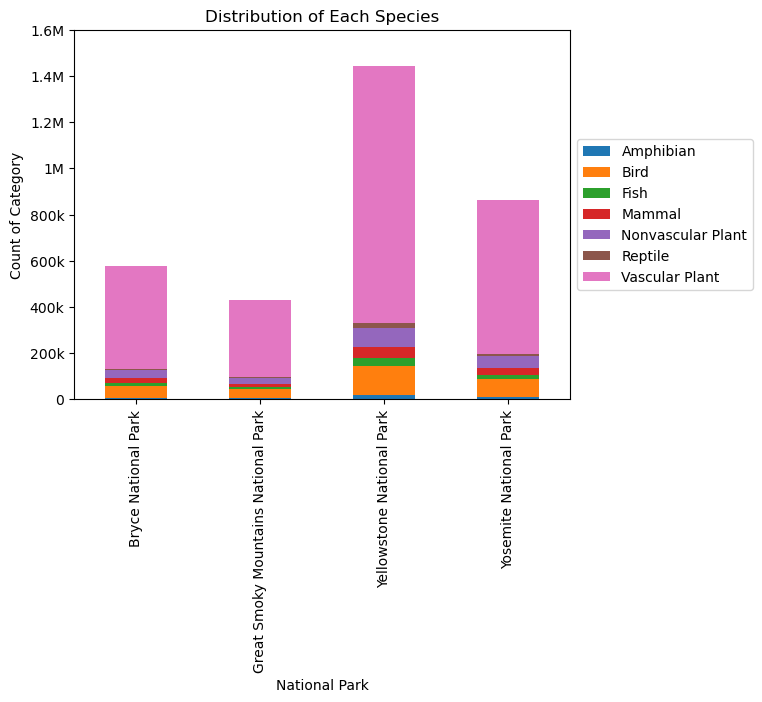

<Figure size 640x480 with 0 Axes>

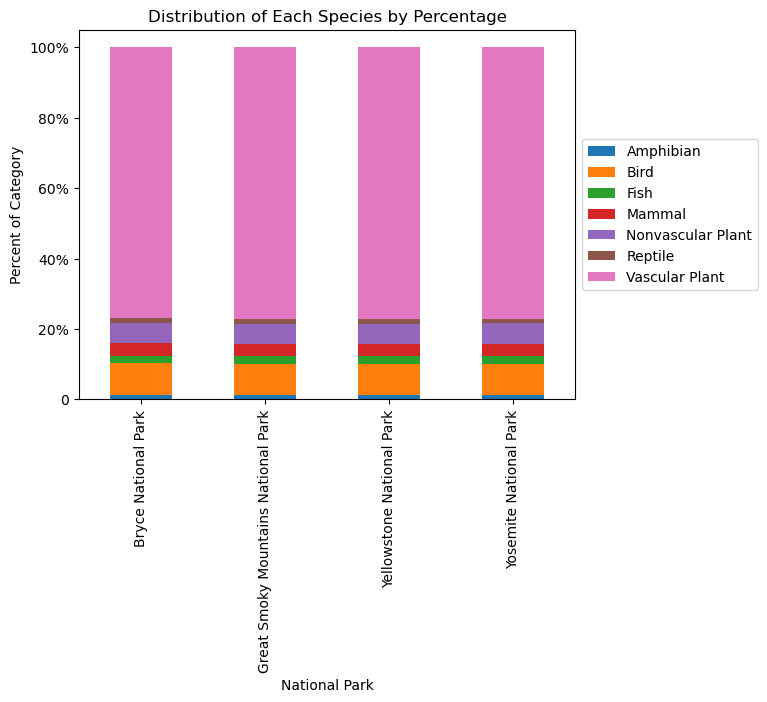

<Figure size 640x480 with 0 Axes>

In [106]:
# species_summary = obs_joined_ordered_clean.groupby(["park_name", "category"]).agg({"observations":"sum"})

# print(species_summary)

park_by_category = obs_joined_ordered_clean.pivot_table(index = "park_name", columns = "category", values = "observations", aggfunc = "sum")
park_by_category_per = obs_joined_ordered_clean.pivot_table(index = "park_name", columns = "category", values = "observations", aggfunc = "sum", margins = True)
park_by_category_per = park_by_category_per.div(park_by_category_per.iloc[:,-1], axis = 0)
park_by_category_per = park_by_category_per.drop(labels = "All", axis = 0)
park_by_category_per = park_by_category_per.drop(labels = "All", axis = 1) #creating a pivot table of the data, setting values to percentages, then dropping the total columns.

print(park_by_category) #checking the result

ax3 = park_by_category.plot.bar(stacked = True) #plotting the stacked bar chart.
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) #setting the legend outside the bar chart
ax3.set_xlabel("National Park")
ax3.set_ylabel("Count of Category")
ax3.set_title("Distribution of Each Species") #setting labels and y ticks
ax3.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000], ["0", "200k", "400k", "600k", "800k", "1M", "1.2M", "1.4M", "1.6M"])
plt.show()
plt.clf()

ax4 = park_by_category_per.plot.bar(stacked = True) #plotting the stacked bar chart.
ax4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) #setting the legend outside the bar chart
ax4.set_xlabel("National Park")
ax4.set_ylabel("Percent of Category")
ax4.set_title("Distribution of Each Species by Percentage") #setting labels and y ticks
ax4.set_yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ["0", "20%", "40%", "60%", "80%", "100%"])
plt.show()
plt.clf()

# Considering Species Distributions

Looking at the two charts above, one shows the raw counts of each species in each national park as a bar chart, the second shows the percentage of observations.

The first chart we can see that for all national parks, Vascular plants make up the majority of observations, which is unsurprising considering that they were by far the most populated of the unique species. The second chart we can see, despite some tiny variations that can be seen when looking at the raw data, the percentage distributions are broadly the same across all national parks. With almost 80% of observations being Vascular Plants. 

Considering the number of observations per square km below:

- Yellowstone National Park: 1442314 / 8891 ~ 162 observations per square km
- Great Smoky Mountain National Park: 431378 / 2114 ~ 204 observation per square km
- Bryce National Park: 575901 / 145 ~ 3971 observations per square km
- Yosemite National Park: 862836 / 3074 ~ 280 observations per square km

Considering above, by a significantly large margin, Bryce National Park is by far the most densly populated national park, with almost 4000 counted observations of species per square km. Despite Yellowstone having the largest number of observations is is the most sparcely populated national park. This could be due to the natural geography of the area as it is a volcanic region. Great Smoky Mountain National Park doesn't have much more observations per square km compared to Yellowstone and may have a geography that is more friendly. Further study into the geography of each area would be needed to consider any conclusion from this.

In [142]:
pd.options.display.width = 1000

idx1 = obs_joined_ordered_clean.groupby(["park_name"])['observations'].transform("max") == obs_joined_ordered_clean['observations']
#filtering the data to rows with the max value of observations grouped by park name
max_obs = obs_joined_ordered_clean[idx1] #applying index filter to the table to get the most spotted species
print(max_obs)


idx2 = obs_joined_ordered_clean.groupby(["park_name"])['observations'].transform("min") == obs_joined_ordered_clean['observations']
#filtering the data to the rows with the min value of observations grouped by park name
min_obs = obs_joined_ordered_clean[idx2] #applying index filter to the table to get the least spotted species.
print(min_obs)

             category conservation_status                  scientific_name                            park_name  observations
6682   Vascular Plant          No Concern  Ivesia shockleyi var. shockleyi               Yosemite National Park           223
11281  Vascular Plant          No Concern           Lycopodium tristachyum            Yellowstone National Park           321
8840   Vascular Plant          No Concern         Sonchus asper ssp. asper  Great Smoky Mountains National Park           147
13138  Vascular Plant          No Concern             Valerianella radiata                  Bryce National Park           176
             category conservation_status     scientific_name                            park_name  observations
15511  Vascular Plant          No Concern  Collomia tinctoria  Great Smoky Mountains National Park            10
9418   Vascular Plant          No Concern     Corydalis aurea                  Bryce National Park             9
10848            Bird          

# Considering Most Recoreded and Least Recorded Species

Considering the two tables above, we can see that in each park, the most recorded species are all Vascular Plants. However, none of the plants recorded are the same for any nationalpark, showing that each national park has different most recorded species.

Looking at the bottom table, it comes as a surprise that the least recorded species for the Great Smoky Mountain National Park and Bryce National Park are species of no concern. Whereas, Yellowstone National Park and Yosemite National Park both have endangered species as their least spotted. It may be that the two plant species that were not spotted frequently in the other two parks grow in abundance elsewhere, or there should be further study.

In [164]:
idx3 = obs_joined_ordered_clean.groupby(["park_name", "category"])['observations'].transform("max") == obs_joined_ordered_clean['observations']
#filtering on both park name and categroy to dig deeper into the most spotted species by category of animal/plant
max_obs_per_cat = obs_joined_ordered_clean[idx3]
max_obs_per_cat = max_obs_per_cat[["park_name", "category", "scientific_name", "conservation_status", "observations"]] #reordering columns
max_obs_per_cat = max_obs_per_cat.sort_values(["park_name", "category"]) #sorting by park name then by category
print(max_obs_per_cat)


                                 park_name           category                      scientific_name conservation_status  observations
5303                   Bryce National Park          Amphibian                       Rana sylvatica          No Concern           133
12910                  Bryce National Park               Bird                        Bubulcus ibis          No Concern           164
23198                  Bryce National Park               Fish                  Notropis photogenis          No Concern           154
11089                  Bryce National Park             Mammal                     Martes americana          No Concern           167
22289                  Bryce National Park  Nonvascular Plant              Brachythecium rutabulum          No Concern           156
2592                   Bryce National Park            Reptile            Lampropeltis getula nigra          No Concern           155
21651                  Bryce National Park            Reptile        

# Most Spotted species in each park by Category

The above table serves as a deeper look at each park and category of animal/plant. The majority of national parks have a different species spotted the most per category. There is some overlap though. In the Smoky Mountains and Yellowstone the Lasiurus Borealis is the most spotted mammal in each, which is a species of bat. 

In [162]:
idx4 = obs_joined_ordered_clean.groupby(["park_name", "category"])['observations'].transform("min") == obs_joined_ordered_clean['observations']
min_obs_per_cat = obs_joined_ordered_clean[idx4]
min_obs_per_cat = min_obs_per_cat[["park_name", "category", "scientific_name", "conservation_status", "observations"]]
min_obs_per_cat = min_obs_per_cat.sort_values(["park_name", "category"])
print(min_obs_per_cat)

                                 park_name           category                      scientific_name conservation_status  observations
16314                  Bryce National Park          Amphibian                         Rana sierrae          Endangered            31
6458                   Bryce National Park               Bird                  Vermivora bachmanii          Endangered            20
6840                   Bryce National Park               Fish                      Noturus baileyi          Endangered            22
16883                  Bryce National Park             Mammal              Ovis canadensis sierrae          Endangered            22
13204                  Bryce National Park  Nonvascular Plant                    Grimmia laevigata          No Concern            39
12594                  Bryce National Park            Reptile  Pituophis melanoleucus melanoleucus  Species of Concern            66
9418                   Bryce National Park     Vascular Plant        

# Least Spotted Species by Category

The table above serves as a deeper look at the least recorded species in each national park. Considering the conservation status information, the majority of these are of some concern, however there are 9 entries of no concern. There are more species in common here than in the previous table, with the Amphibian being in common across all 4 national parks, the Rana sierrae, a type of frog which is labelled as endangered. Similarlly the mamml Canis Rufus, a type of wolf (tied with a Canis Lupus in Yellowstone) as the least spotted, both labelled as Endangered. This could be due to loss of habitat due to human intervention. 

There are other species in common across the parks such as Grus Americana, a type of endangered crane. The Geum radiatum, a rare species of plant of the rose family is common in both Yellowstone and Yosemite. An interesting note is that non of the noncascular plants that are least spotted are labelled as of any concern. Similarly the reptiles across 3 parks are not of concern, except in Bryce, aswell as only two of the vascular plants.

It seems that the Mammals, fish, and amphibians are most likely to be labelled as at least of some concern, whereas the other categories not necessarily so despite low observations (as low as 9 in some of the parks)

# In Conclusion

Looking at the four national parks we can see that Mammals, Fish, Birds and Amphibians are likely to be labelled as of some concern. Whilst plantlife makes up a large proportion of the recorded data, the likelehood that one is labelled as of concern is low, similarly for reptiles. The most likely species to be labelled as of concern are Birds, Fish are the category listed as Threatened, whereas Mammals are most liklely to be labelled as endangered.

There are many reasons why this could be the case in each of the national parks, but more data is required such as the geography of the areas, the geology particularly for plant life, whether any of the animals migrate or move between areas, the time of year the data was taken especialy for migratory animals and seasonal plants.

A silver lining is two bird species listed as recovering, likely due to conservation efforts. However more is to be done to ensure those listed as of concern do not fall further in decline as well as to recover those who are threatened or endangered.